# **Engineering Graduate Salary Prediction**

Our objective is to determine the salary of an engineering graduate in India.

## **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns 

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

## **Loading Dataset**

In [2]:
df = pd.read_csv('./Engineering_graduate_salary.csv')

In [3]:
# lets take a glimpse of first five rows of the data
df.head().style.bar(
    color='#606ff2').background_gradient(cmap='plasma')

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.800000,cbse,2009,84.000000,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.820000,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.159000,0.378900,1.239600,0.145900,0.288900,445000
1,988334,m,1990-05-15,57.000000,cbse,2010,64.500000,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.000000,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.133600,0.045900,1.239600,0.526200,-0.285900,110000
2,301647,m,1989-08-21,77.330000,"maharashtra state board,pune",2007,85.170000,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.940000,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.510000,-0.123200,1.542800,-0.290200,-0.287500,255000
3,582313,m,1991-05-04,84.300000,cbse,2009,86.000000,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.400000,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.446300,0.212400,0.317400,0.272700,0.480500,420000
4,339001,f,1990-10-30,82.000000,cbse,2008,75.000000,cbse,4889,2,B.Tech/B.E.,biotechnology,64.300000,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.499200,-0.747300,-1.069700,0.062230,0.186400,200000


In [4]:
# checking shape of dataframe
df.shape

(2998, 34)

In [5]:
# lets check for all the columns
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

## **Data Description**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

Detailed description about the data

* ID: A unique ID to identify a candidate
* Salary: Annual CTC offered to the candidate (in INR)
* Gender: Candidate's gender
* DOB: Date of birth of the candidate
* 10percentage: Overall marks obtained in grade 10 examinations
* 10board: The school board whose curriculum the candidate followed in grade 10
* 12graduation: Year of graduation - senior year high school
* 12percentage: Overall marks obtained in grade 12 examinations
* 12board: The school board whose curriculum the candidate followed
* CollegeID: Unique ID identifying the university/college which the candidate attended for her/his undergraduate
* CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
* Degree: Degree obtained/pursued by the candidate
* Specialization: Specialization pursued by the candidate
* CollegeGPA: Aggregate GPA at graduation
* CollegeCityID: A unique ID to identify the city in which the college is located in.
* CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
* CollegeState: Name of the state in which the college is located
* GraduationYear: Year of graduation (Bachelor's degree)
* English: Scores in AMCAT English section
* Logical: Score in AMCAT Logical ability section
* Quant: Score in AMCAT's Quantitative ability section
* Domain: Scores in AMCAT's domain module
* ComputerProgramming: Score in AMCAT's Computer programming section
* ElectronicsAndSemicon: Score in AMCAT's Electronics & Semiconductor Engineering section
* ComputerScience: Score in AMCAT's Computer Science section
* MechanicalEngg: Score in AMCAT's Mechanical Engineering section
* ElectricalEngg: Score in AMCAT's Electrical Engineering section
* TelecomEngg: Score in AMCAT's Telecommunication Engineering section
* CivilEngg: Score in AMCAT's Civil Engineering section
* conscientiousness: Scores in one of the sections of AMCAT's personality test
* agreeableness: Scores in one of the sections of AMCAT's personality test
* extraversion: Scores in one of the sections of AMCAT's personality test
* nueroticism: Scores in one of the sections of AMCAT's personality test
* openess_to_experience: Scores in one of the sections of AMCAT's personality test Note: To give you more context AMCAT is a job portal.

In [7]:
# lets check for missing values 
df.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

##### **No missing values are present.**

In [8]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2998.0,664892.583389,364895.076716,11244.0000,333464.750000,639694.500000,995177.000000,1.297877e+06
10percentage,2998.0,77.666264,10.002785,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.0000,2007.000000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.341061,11.120299,40.0000,66.000000,74.000000,82.600000,9.870000e+01
CollegeID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeTier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.509857,8.122462,6.6300,66.530000,71.800000,76.300000,9.993000e+01
CollegeCityID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeCityTier,2998.0,0.296197,0.456655,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,2998.0,2011.939960,36.780582,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


* ##### **CollegeGPA may contains some outlier values because the minimum and mean value are far away from each other. if it is the case, We can check it later in Data Visualization.**
* ##### **We need to handle -1 value, so first we will simply convert it into NaN and then substitute mean/median inplace of NaN according to the requirement.**

In [9]:
# dropping features which do not make any sense to predict salary
df.drop(['ID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState'
                                     , 'CollegeCityTier'], axis = 1, inplace = True)

In [10]:
# lets check the shape again
df.shape

(2998, 26)

## **Data Cleaning**

In [11]:
# fill missing values
df.replace(-1, np.NaN,inplace=True)

In [12]:
# lets check the missing values again
df.isnull().sum()

Gender                      0
DOB                         0
10percentage                0
12percentage                0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    179
ComputerProgramming       650
ElectronicsAndSemicon    2133
ComputerScience          2298
MechanicalEngg           2811
ElectricalEngg           2876
TelecomEngg              2724
CivilEngg                2972
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Salary                      0
dtype: int64

In [13]:
# list of columns with null values 
missing_values_columns = [col for col in df.columns if df.isnull().sum()[col] > 0]

In [14]:
# function for missing values substitution
def fill_missing_values(df,missing_values_columns):
    data = df.copy()
    '''Filling missing values with mean'''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())
     
    return data

# lets use this function to fill the missing values
df = fill_missing_values(df,missing_values_columns)

## **Exploratory Data Analysis**

### Correlation Analysis

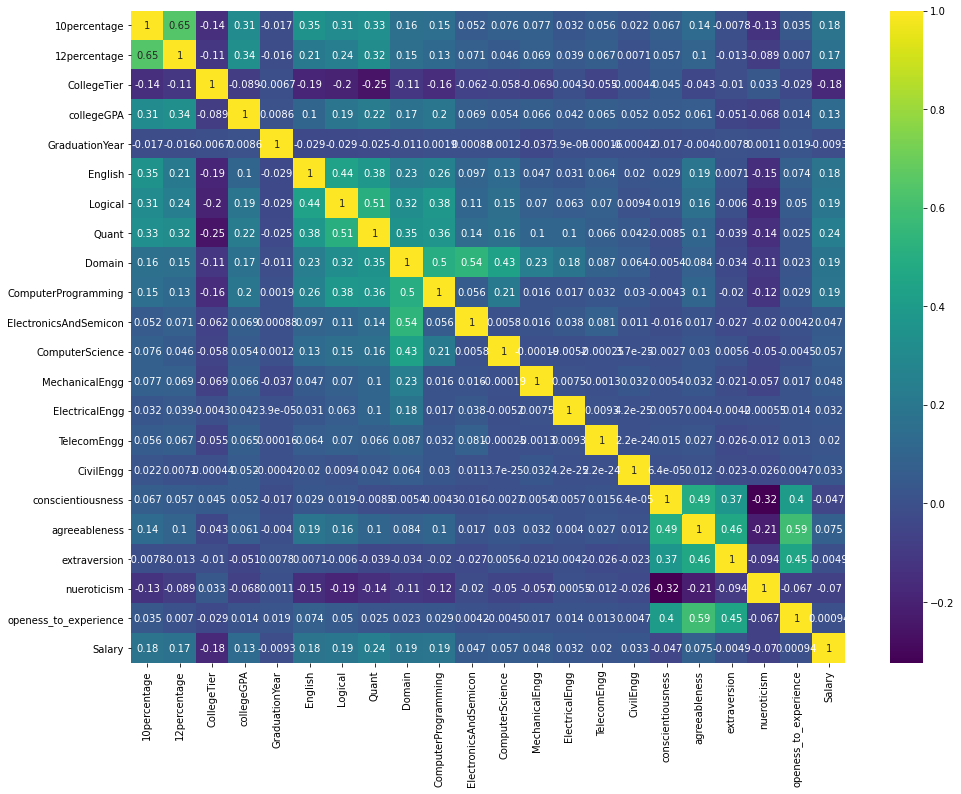

In [15]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

### Analysis of Variable Salary

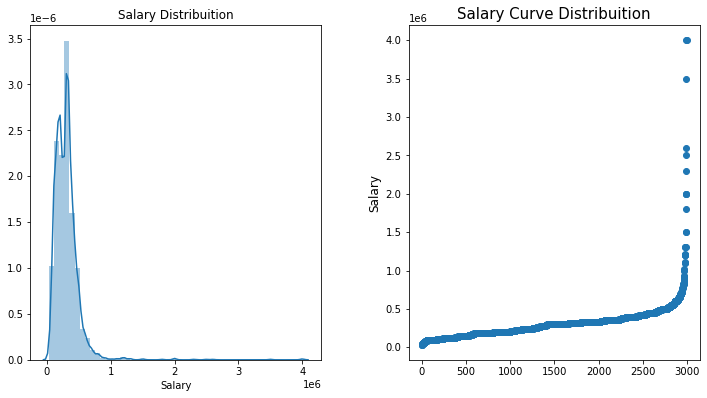

In [16]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(df['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

##### **Most of the graduates having salaries under 10 lakhs.**
##### **Long tail of distribution is longer on right hand side as compared to left hand side which shows that distribution is positively skewed.**

### Analysis of Salary and Gender

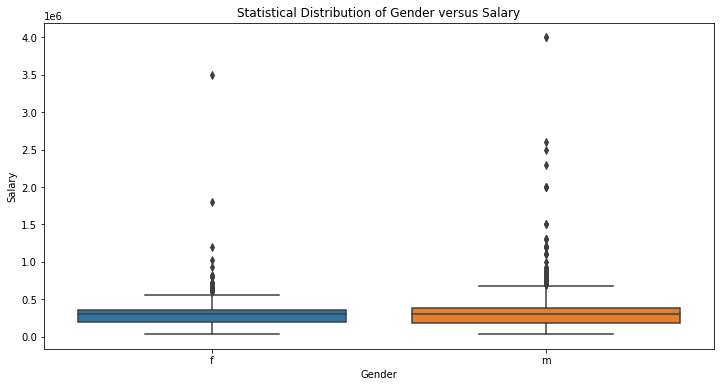

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Gender'], y=df['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

##### **It is clearly visible from the plot that the Average salary for man and woman are looking almost same.**

### Analysis of 10th and 12th percentage by college tier

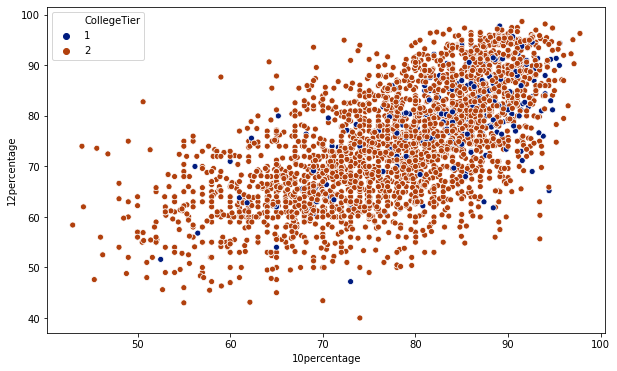

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = '10percentage', y = '12percentage', hue = 'CollegeTier',palette='dark', data = df)
plt.show()

##### **According to correlation plot and scatterplot, we can see that 10th and 12th are positively correlated, this is the case of multicollinearity so I have decided to keep only one.**

### Analysis of Salary and Specialization

In [19]:
# checking the count of unique specialization present in dataframe
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation      

In [20]:
# create the copy of dataframe
data = df.copy()
# count of unique categories in specialization
value_count = data['Specialization'].value_counts()

def map_to_other_specialization(var):
    ''' if count of unique category is less than 10, replace the category as other '''
    if var in value_count[value_count<=10]:
        return 'other'
    else:
        return var
    
# apply the function to specialization to get the results    
df['Specialization'] = df.Specialization.apply(map_to_other_specialization)

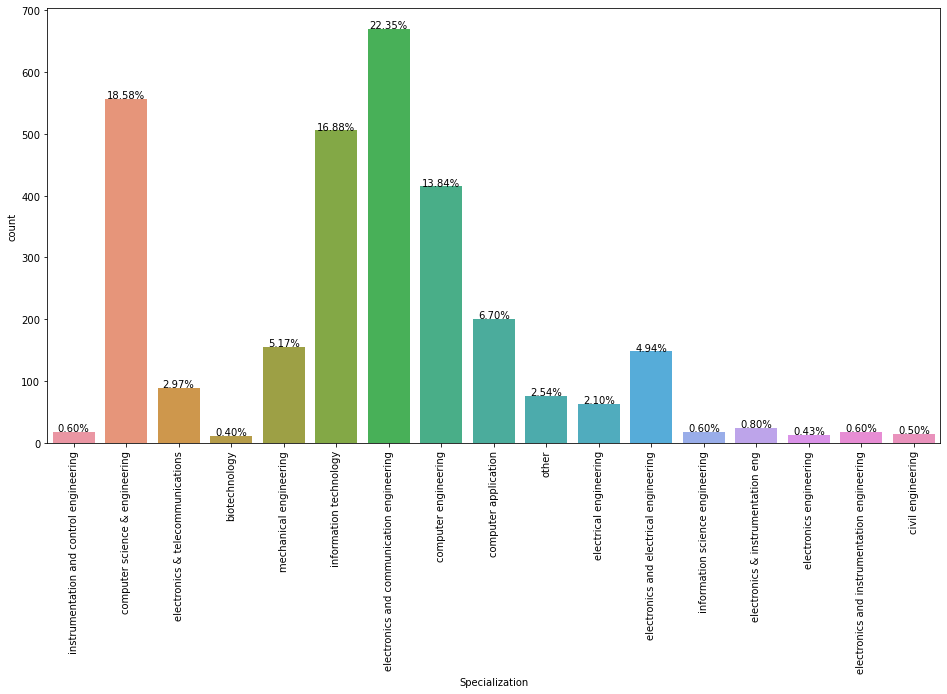

In [21]:
# count plot of unique categories in specialization 
plt.figure(figsize = (16, 8))
total = float(len(df))
ax = sns.countplot(x='Specialization',data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10) 
plt.xticks(rotation = 90)
plt.show()

In [22]:
# electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category
df['Specialization'] = df['Specialization'].str.replace('electronics & instrumentation eng',\
                                                'electronics and instrumentation engineering')

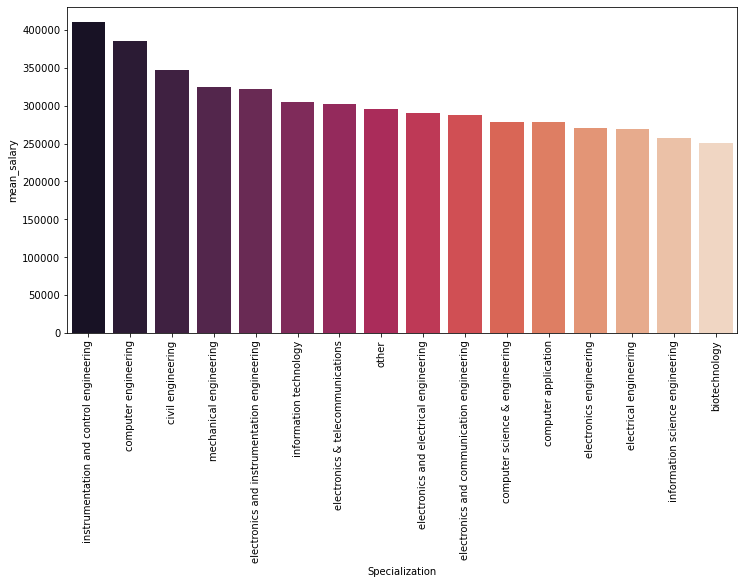

In [23]:
# average salary by specialization and sort them in decreasing order
avg_sal_per_specialization = df.groupby('Specialization').agg(mean_salary =("Salary", 'mean')).sort_values(by = 'mean_salary',ascending=False)

# barplot of mean salary and specialization
plt.figure(figsize = (12, 6))
sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')
plt.xticks(rotation = 90)
plt.show()

##### **ICE Engineer, Computer Engineer and Electronics Engineer having highest mean salary.**

### Analysis of Salary and College GPA

In [24]:
# interesting insights  
df[df['Salary'] == df.Salary.max()]

,Gender,DOB,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
2295,m,1987-09-09,90.83,88.77,1,B.Tech/B.E.,computer engineering,72.6,2010,675,...,402.026738,423.336066,349.879562,338.807692,-0.7264,0.0328,-1.6502,-0.8778,-0.1295,4000000
2964,m,1987-09-13,53.00,61.00,2,MCA,computer application,65.0,2010,405,...,402.026738,423.336066,349.879562,338.807692,-3.3539,-0.4353,-1.0697,-0.0552,-2.6572,4000000


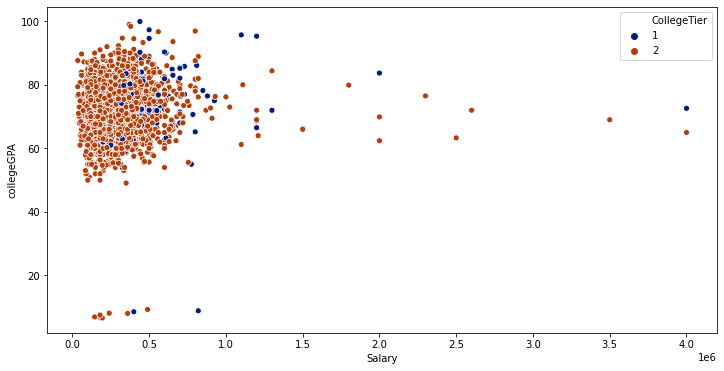

In [25]:
# lets plot collegeGPA as we noticed in summary statistics
plt.figure(figsize = (12, 6))
sns.scatterplot(x ='Salary', y = 'collegeGPA',hue='CollegeTier',data=df,palette = 'dark')
plt.show()

##### **lets drop some outliers points-**
                  - CollegeGPA < 40
                  - Salary > 15 lakh

In [26]:
# filter the dataframe where collegeGPA > 40 and salary is less then 15 lakh
df = df.loc[(df['collegeGPA'] > 40) & (df['Salary'] < 1500000)] 

In [27]:
# lets check shape again
df.shape

(2977, 26)

### Analysis of Salary and Degree

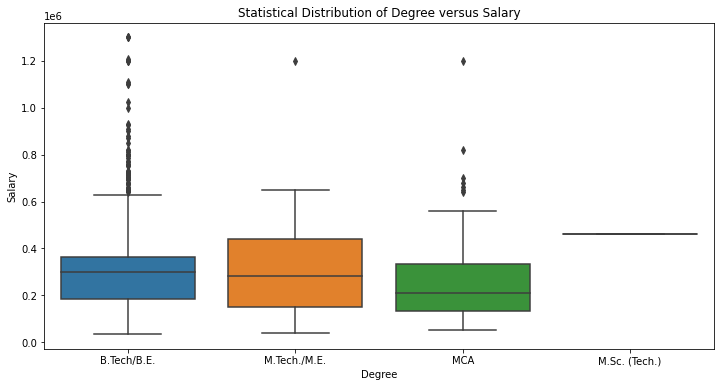

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Degree'], y=df['Salary'] )

plt.title('Statistical Distribution of Degree versus Salary')
plt.show()

In [29]:
df['Degree'].value_counts()

B.Tech/B.E.      2739
MCA               199
M.Tech./M.E.       38
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

##### **Average salary is highest for BE/B.tech graduates as compared to any other degree graduates.**

## **Data Preprocessing**

In [30]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']

# creating list of numerical columns to standardized data 
numerical_columns = [col for col in df.columns if (df.dtypes[col] != 'object')]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']


Categorical Features are :  ['Gender', 'DOB', 'Degree', 'Specialization']


In [31]:
# remove DOB & Graduation year from categorical features list

# items to be romoved
unwanted_cat = ['DOB','GraduationYear']
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_cat]
print(categorical_columns)

['Gender', 'Degree', 'Specialization']


### Handling Datetime feature

In [32]:
# lets convert DOB & Graduation year to datetime 
df['DOB'] = pd.to_datetime(df['DOB'])
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'])

In [33]:
# lets create a new feature BirthYear which is important if you want to see, how old the candidate was when he/she completed degree.

df['birth_year'] = df['DOB'].dt.year

df['GraduationYear'] = df['GraduationYear'].dt.year

# lets drop DOB
df.drop('DOB',axis=1,inplace=True)

### OneHotEncoding for Categorical Features

In [34]:
# one hot encoding function for categorical features 
def onehot_encoder(df, cols):
    df = df.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col])
        # concatenating dummies and original dataframe
        df = pd.concat([df, dummies], axis=1)
        
        # dropping original coolumns for which encoding is applied.
        df.drop(col, axis=1,inplace=True)
    return df

In [35]:
df = onehot_encoder(df,categorical_columns)

In [36]:
# lets drop one column from each encoded categorical feature to avoid dummy trap 
df.drop(['f','M.Sc. (Tech.)','biotechnology'],axis=1,inplace=True)

In [37]:
# rename the gender column
df.rename({'m':'Gender'},axis=1,inplace=True)

### Handling Numerical Features

In [38]:
df[numerical_columns].head()

,10percentage,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,87.80,84.00,1,73.82,1970,650,665,810,0.694479,485.000000,...,402.026738,423.336066,349.879562,338.807692,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,57.00,64.50,2,65.00,1970,440,435,210,0.342315,365.000000,...,402.026738,423.336066,349.879562,338.807692,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,77.33,85.17,2,61.94,1970,485,475,505,0.824666,449.553663,...,402.026738,423.336066,260.000000,338.807692,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,84.30,86.00,1,80.40,1970,675,620,635,0.990009,655.000000,...,402.026738,423.336066,349.879562,338.807692,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,82.00,75.00,2,64.30,1970,575,495,365,0.278457,315.000000,...,402.026738,423.336066,349.879562,338.807692,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [39]:
# lets remove collegeTier from numerical features list because it is binary variable
# drop salary and GraduationYear
# items to be romoved
unwanted_num = ['CollegeTier','Salary','GraduationYear']
numerical_columns = [ele for ele in numerical_columns if ele not in unwanted_num]
print(numerical_columns)

['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [40]:
# Split df into dependent(y) and indepedent variables(X)
X = df.drop('Salary',axis=1)
y = df['Salary']

### Train-Test Split

In [41]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Scaling Numerical Features

In [42]:
# Scaling Numerical Features

sc = StandardScaler()
X_train[numerical_columns] = sc.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = sc.transform(X_test[numerical_columns])

### Model Building

#### Linear Regression

In [43]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)

linear_reg_r2_score = linear_reg.score(X_test, y_test)

print("Linear Regression R^2 Score: {:.4f}".format(linear_reg_r2_score))

Linear Regression R^2 Score: 0.2143


#### XGBoost Model

In [44]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_r2 = xgb.score(X_test, y_test)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))

XGBoost R^2 Score: 0.06524


#### Error Plot

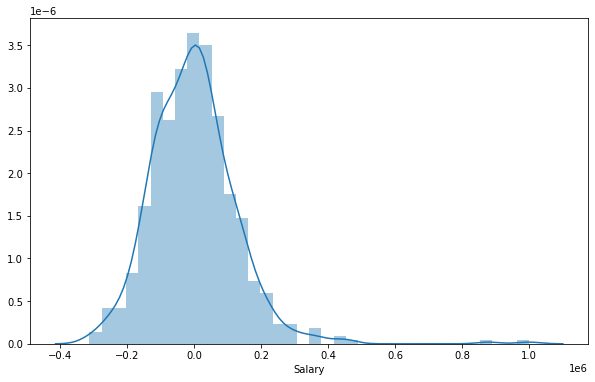

In [45]:
# Linear Regression Error plot
errors_reg = y_test - y_pred_linear_reg

plt.figure(figsize = (10,6))
sns.distplot(errors_reg)
plt.show()

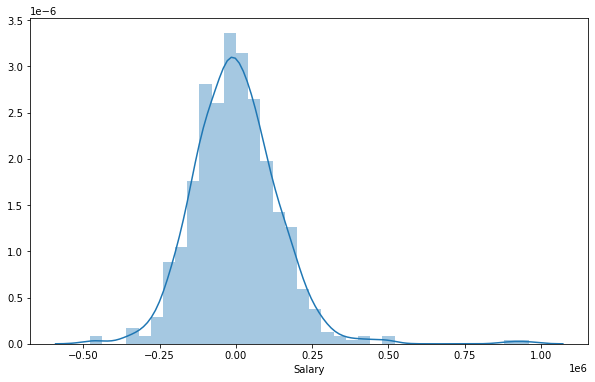

In [46]:
# XGBoost Error plot
errors = y_test - y_pred_xgb

plt.figure(figsize = (10,6))
sns.distplot(errors)
plt.show()